In [11]:
%matplotlib inline

import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from PIL import Image
import sys
from pathlib import Path
import json

IMAGE_WIDTH = 128
IMAGE_HEIGHT = 128

SCRIPT_PATH = Path('/content/drive/MyDrive/Colab Notebooks/STARGAN')
DEFAULT_TFRECORDS_PATH = SCRIPT_PATH / 'tfrecords-output'
 
try:
    json_file = DEFAULT_TFRECORDS_PATH / 'dataset.json'
    with json_file.open('r') as f:
        json_dict = json.load(f)
except: 
    print("Can't open json file.")
    sys.exit()

NUM_INPUT_DATA = json_dict['num_train_images']
TARGET_LABEL_LIST = np.asarray(json_dict['target_label_list'], dtype=np.float32)
ATTRIBUTE_LIST = json_dict["attribute_list"]

In [5]:
model = tf.saved_model.load('/content/drive/MyDrive/Colab Notebooks/STARGAN/EXP_1/stargan')

In [14]:
def generate_images(model, image):

    test_image = image.resize((IMAGE_WIDTH, IMAGE_HEIGHT))
    test_image = np.asarray(test_image, dtype=np.float32)
    test_image = test_image/127.5-1.0

    plt.figure(figsize=(15, 12))

    for i in range(12):
        tar_label = np.asarray(TARGET_LABEL_LIST[i])

        title_name = ''
        for j in range(len(ATTRIBUTE_LIST)):
            if tar_label[j] == 1:
                title_name += (ATTRIBUTE_LIST[j]+'+')
        title_name = title_name[:-1]

        test_images = test_image[np.newaxis, :]
        tar_labels = tar_label[np.newaxis, :]

        images = model([test_images, tar_labels], training=False)
        
        image = images[0, :, :, :]
        image = (image+1)/2

        plt.subplot(3, 4, i+1)
        plt.imshow(image)
        plt.axis('off')
        plt.title(title_name)

    plt.tight_layout()  
    #plt.savefig(IMG_SAVE_PATH / f'image_at_step_{step:08d}.png')
    plt.show()

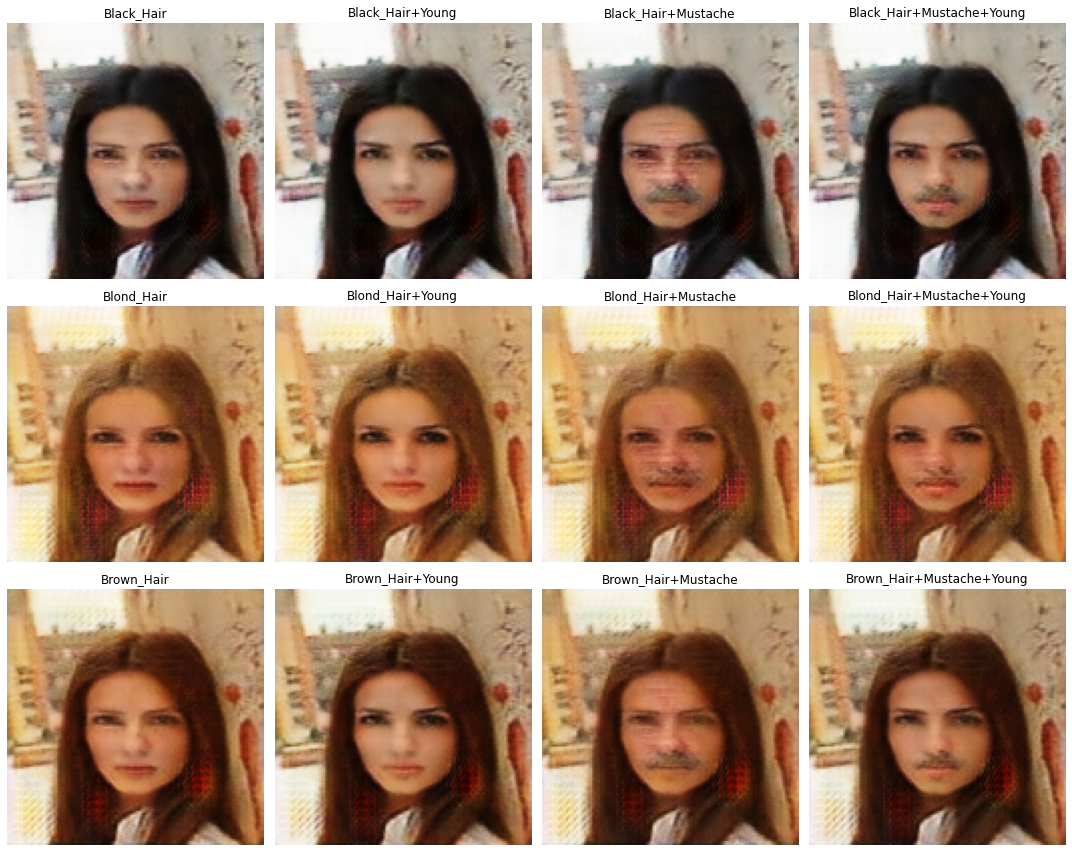

In [26]:
test_image = Image.open(DEFAULT_TFRECORDS_PATH / 'test.jpg')
generate_images(model, test_image)